# Thyroid predictions

# All imports needed for future learning.

In [395]:
#general imports
import sys
import pandas as pd
import numpy as np
import sklearn
from math import sqrt
import tensorflow
import keras

#preprocessing imports
from sklearn import preprocessing 


# plotting imports
import matplotlib as plt
import matplotlib.pyplot as pyplots
import seaborn as sns
import scikitplot as skplt

# various model imports
from sklearn import model_selection
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential

# required for future learing 
from keras.layers.core import Dense, Activation, Lambda, Reshape,Flatten
from keras.layers import Conv1D,Conv2D,MaxPooling2D, MaxPooling1D, Reshape
from keras.utils import np_utils
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import Dropout
from keras import backend as K
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import CSVLogger
from keras.callbacks import EarlyStopping
from keras.layers.merge import Concatenate
from keras.callbacks import ModelCheckpoint

#Post prediction imports.
# metrics imports
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import mean_squared_error


#saving models
import joblib



In [396]:
keras.backend.backend()

'tensorflow'

# import data set

In [397]:
df = pd.read_csv("Thyroid.csv", sep=','  , engine='python')
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [398]:
df['binaryClass'].unique()

array(['P', 'N'], dtype=object)

In [399]:
df = df.drop(['TBG','TBG measured','referral source'], axis =1)
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,1.3,t,2.5,t,125,t,1.14,t,109,P
1,23,F,f,f,f,f,f,f,f,f,...,4.1,t,2,t,102,f,?,f,?,P
2,46,M,f,f,f,f,f,f,f,f,...,0.98,f,?,t,109,t,0.91,t,120,P
3,70,F,t,f,f,f,f,f,f,f,...,0.16,t,1.9,t,175,f,?,f,?,P
4,70,F,f,f,f,f,f,f,f,f,...,0.72,t,1.2,t,61,t,0.87,t,70,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,f,?,P
3768,68,F,f,f,f,f,f,f,f,f,...,1,t,2.1,t,124,t,1.08,t,114,P
3769,74,F,f,f,f,f,f,f,f,f,...,5.1,t,1.8,t,112,t,1.07,t,105,P
3770,72,M,f,f,f,f,f,f,f,f,...,0.7,t,2,t,82,t,0.94,t,87,P


In [400]:
df.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'binaryClass'],
      dtype='object')

In [401]:
df.shape

(3772, 27)

# Make categoric features using dummies with elimination of the original

In [402]:
df = pd.get_dummies(df, columns=['sex','on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 
       'T3 measured', 'TT4 measured', 'T4U measured', 
       'FTI measured','binaryClass'], drop_first=True)

In [403]:
df.columns

Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'sex_F', 'sex_M',
       'on thyroxine_t', 'query on thyroxine_t', 'on antithyroid medication_t',
       'sick_t', 'pregnant_t', 'thyroid surgery_t', 'I131 treatment_t',
       'query hypothyroid_t', 'query hyperthyroid_t', 'lithium_t', 'goitre_t',
       'tumor_t', 'hypopituitary_t', 'psych_t', 'TSH measured_t',
       'T3 measured_t', 'TT4 measured_t', 'T4U measured_t', 'FTI measured_t',
       'binaryClass_P'],
      dtype='object')

In [404]:
df['binaryClass_P'].unique()

array([1, 0], dtype=uint8)

In [405]:
df.shape

(3772, 28)

In [406]:
df.dtypes

age                            object
TSH                            object
T3                             object
TT4                            object
T4U                            object
FTI                            object
sex_F                           uint8
sex_M                           uint8
on thyroxine_t                  uint8
query on thyroxine_t            uint8
on antithyroid medication_t     uint8
sick_t                          uint8
pregnant_t                      uint8
thyroid surgery_t               uint8
I131 treatment_t                uint8
query hypothyroid_t             uint8
query hyperthyroid_t            uint8
lithium_t                       uint8
goitre_t                        uint8
tumor_t                         uint8
hypopituitary_t                 uint8
psych_t                         uint8
TSH measured_t                  uint8
T3 measured_t                   uint8
TT4 measured_t                  uint8
T4U measured_t                  uint8
FTI measured

In [407]:
df

,age,TSH,T3,TT4,T4U,FTI,sex_F,sex_M,on thyroxine_t,query on thyroxine_t,...,goitre_t,tumor_t,hypopituitary_t,psych_t,TSH measured_t,T3 measured_t,TT4 measured_t,T4U measured_t,FTI measured_t,binaryClass_P
0,41,1.3,2.5,125,1.14,109,1,0,0,0,...,0,0,0,0,1,1,1,1,1,1
1,23,4.1,2,102,?,?,1,0,0,0,...,0,0,0,0,1,1,1,0,0,1
2,46,0.98,?,109,0.91,120,0,1,0,0,...,0,0,0,0,1,0,1,1,1,1
3,70,0.16,1.9,175,?,?,1,0,1,0,...,0,0,0,0,1,1,1,0,0,1
4,70,0.72,1.2,61,0.87,70,1,0,0,0,...,0,0,0,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,?,?,?,?,?,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3768,68,1,2.1,124,1.08,114,1,0,0,0,...,0,0,0,0,1,1,1,1,1,1
3769,74,5.1,1.8,112,1.07,105,1,0,0,0,...,0,0,0,0,1,1,1,1,1,1
3770,72,0.7,2,82,0.94,87,0,1,0,0,...,0,0,0,0,1,1,1,1,1,1


vkin = df[:,0]
vkin

In [408]:
df.isnull().sum()

age                            0
TSH                            0
T3                             0
TT4                            0
T4U                            0
FTI                            0
sex_F                          0
sex_M                          0
on thyroxine_t                 0
query on thyroxine_t           0
on antithyroid medication_t    0
sick_t                         0
pregnant_t                     0
thyroid surgery_t              0
I131 treatment_t               0
query hypothyroid_t            0
query hyperthyroid_t           0
lithium_t                      0
goitre_t                       0
tumor_t                        0
hypopituitary_t                0
psych_t                        0
TSH measured_t                 0
T3 measured_t                  0
TT4 measured_t                 0
T4U measured_t                 0
FTI measured_t                 0
binaryClass_P                  0
dtype: int64

In [409]:
df['tumor_t'].unique()

array([0, 1], dtype=uint8)

In [410]:
df.columns

Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'sex_F', 'sex_M',
       'on thyroxine_t', 'query on thyroxine_t', 'on antithyroid medication_t',
       'sick_t', 'pregnant_t', 'thyroid surgery_t', 'I131 treatment_t',
       'query hypothyroid_t', 'query hyperthyroid_t', 'lithium_t', 'goitre_t',
       'tumor_t', 'hypopituitary_t', 'psych_t', 'TSH measured_t',
       'T3 measured_t', 'TT4 measured_t', 'T4U measured_t', 'FTI measured_t',
       'binaryClass_P'],
      dtype='object')

# filling Missing data-- isnull doesnot find 'TBD' or '?' kind of temp data

In [411]:
df[df['T4U']=='?'].size

10836

In [412]:
df[df['T4U']!='?'].size

94780

In [413]:
df[df['T4U']!='?'].size

94780

# Convert the remaining features to numeric 

In [414]:
df['age'] = df['age'].apply(pd.to_numeric, errors='coerce')
df['TSH'] = df['TSH'].apply(pd.to_numeric, errors='coerce')

df['T3'] = df['T3'].apply(pd.to_numeric, errors='coerce')
df['TT4'] = df['TT4'].apply(pd.to_numeric, errors='coerce')
df['T4U'] = df['T4U'].apply(pd.to_numeric, errors='coerce')
df['FTI'] = df['FTI'].apply(pd.to_numeric, errors='coerce')
df.dtypes

age                            float64
TSH                            float64
T3                             float64
TT4                            float64
T4U                            float64
FTI                            float64
sex_F                            uint8
sex_M                            uint8
on thyroxine_t                   uint8
query on thyroxine_t             uint8
on antithyroid medication_t      uint8
sick_t                           uint8
pregnant_t                       uint8
thyroid surgery_t                uint8
I131 treatment_t                 uint8
query hypothyroid_t              uint8
query hyperthyroid_t             uint8
lithium_t                        uint8
goitre_t                         uint8
tumor_t                          uint8
hypopituitary_t                  uint8
psych_t                          uint8
TSH measured_t                   uint8
T3 measured_t                    uint8
TT4 measured_t                   uint8
T4U measured_t           

In [415]:
df[df['age']==59].size

2660

In [416]:
df['age'] = df['age'].fillna( df['age'].mean())
df['TSH'] = df['TSH'].fillna( df['TSH'].mean())
df['T3'] = df['T3'].fillna( df['T3'].mean())
df['TT4'] = df['TT4'].fillna( df['TT4'].mean())
df['T4U'] = df['T4U'].fillna( df['T4U'].mean())
df['FTI'] = df['FTI'].fillna( df['FTI'].mean())

In [417]:
df['binaryClass_P'] = (~(df['binaryClass_P']>0.5)).astype(int)

In [418]:
y=df['binaryClass_P']
del df['binaryClass_P']

In [419]:
y.unique()

array([0, 1])

In [420]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3767    0
3768    0
3769    0
3770    0
3771    0
Name: binaryClass_P, Length: 3772, dtype: int32

# Initial rough evaluation of data and the effect of them.feature_importances_

In [421]:
modeltest = RandomForestRegressor()

modeltest.fit(df,y)

RandomForestRegressor()

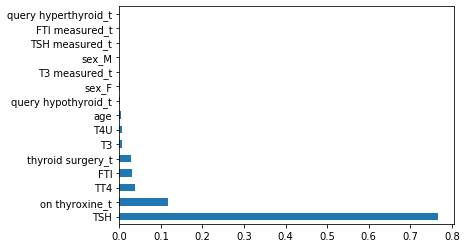

In [422]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(modeltest.feature_importances_, index=df.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [423]:
modeltest.feature_importances_

array([3.95219854e-03, 7.67145607e-01, 7.09147184e-03, 3.77472958e-02,
       5.91432986e-03, 3.07467690e-02, 6.16642302e-04, 2.04621470e-04,
       1.17719263e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.74235658e-02, 0.00000000e+00, 9.26907466e-04,
       3.39972273e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.21060902e-04, 3.17165553e-04,
       0.00000000e+00, 0.00000000e+00, 3.91041966e-05])

In [424]:
df.describe()

,age,TSH,T3,TT4,T4U,FTI,sex_F,sex_M,on thyroxine_t,query on thyroxine_t,...,lithium_t,goitre_t,tumor_t,hypopituitary_t,psych_t,TSH measured_t,T3 measured_t,TT4 measured_t,T4U measured_t,FTI measured_t
count,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,...,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
mean,51.735879,5.086766,2.013500,108.319345,0.995000,110.469649,0.657476,0.302757,0.123012,0.013256,...,0.004772,0.009014,0.025451,0.000265,0.048780,0.902174,0.796129,0.938759,0.897402,0.897932
std,20.082295,23.290853,0.738262,34.496511,0.185156,31.355087,0.474617,0.459512,0.328494,0.114382,...,0.068924,0.094525,0.157510,0.016282,0.215437,0.297119,0.402927,0.239803,0.303473,0.302778
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.600000,1.700000,89.000000,0.890000,94.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,54.000000,1.600000,2.013500,106.000000,0.995000,110.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,67.000000,3.800000,2.200000,123.000000,1.070000,121.250000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [425]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=0)

In [426]:
X_train.shape

(2640, 27)

In [427]:
results = pd.DataFrame(columns=['model', 'accuracy', 'precision','recall', 'fscore'])

In [428]:
threshold =0.5

# Random Forest Classifier

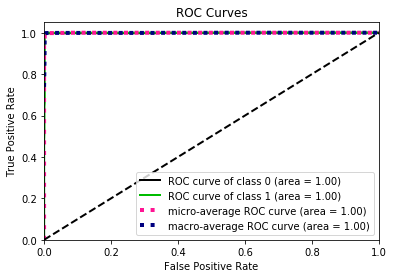

In [429]:
model_RFC = RandomForestClassifier()
classifier = 'RandomForestClassifier'
model_RFC.fit(X_train, y_train) 

pred_test_RFC = model_RFC.predict_proba(X_test)
pred_test_RFC
skplt.metrics.plot_roc(y_test, pred_test_RFC)

In [430]:
accuracy= accuracy_score(y_test, y_pred)
precision,recall,fscore,support=score(y_test,y_pred,average='macro')


MCC= matthews_corrcoef(y_test, y_pred)

Aresult = [[classifier,accuracy,precision,recall,fscore,MCC]]
oneresultdf = pd.DataFrame(Aresult,columns=['model', 'accuracy', 'precision','recall', 'fscore','MCC'])

results.append(oneresultdf)
results=pd.concat([results, oneresultdf])
results

,model,accuracy,precision,recall,fscore,MCC
0,RandomForestClassifier,0.998233,0.990566,0.999027,0.994751,0.989557


In [431]:
joblib_file = "VK_RFC_Model.pkl"  
joblib.dump(model_RF, joblib_file)

['VK_RFC_Model.pkl']

# Random Forest Regressor

In [367]:
model_RF = RandomForestRegressor()
model_RF.fit(X_train, y_train) 

pred_test_RF = model_RF.predict(X_test)

y_pred = [0 if p < threshold else 1 for p in pred_test_RF]
cm = confusion_matrix(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)
print(accuracy)
print (cm)
classifier = 'RandomForestRegressor'

0.9982332155477032
[[1026    2]
 [   0  104]]


In [368]:
pred_test_RF = model_RF.predict(X_test)

In [369]:
accuracy= accuracy_score(y_test, y_pred)
precision,recall,fscore,support=score(y_test,y_pred,average='macro')


MCC= matthews_corrcoef(y_test, y_pred)

Aresult = [[classifier,accuracy,precision,recall,fscore,MCC]]
oneresultdf = pd.DataFrame(Aresult,columns=['model', 'accuracy', 'precision','recall', 'fscore','MCC'])

results.append(oneresultdf)
results=pd.concat([results, oneresultdf])
results

,model,accuracy,precision,recall,fscore,MCC
0,RandomForestClassifier,0.997350,0.989989,0.994220,0.992093,0.984200
0,RandomForestRegressor,0.998233,0.990566,0.999027,0.994751,0.989557


In [370]:
one = model_RF.predict(X_test)

In [371]:
one

array([0., 0., 0., ..., 1., 0., 0.])

In [372]:
joblib_file = "VK_RF_Model.pkl"  
joblib.dump(model_RF, joblib_file)

['VK_RF_Model.pkl']

# Keras Sequential

In [373]:
X_train.shape

(2640, 27)

In [374]:
y_train.shape

(2640,)

In [375]:
X_test.shape

(1132, 27)

In [376]:
y_test.shape

(1132,)

# using saved model

In [377]:
saved_model = Sequential()
# first layer must have a defined input shape
saved_model.add(Dense(32, input_dim=27))
# afterwards, Keras does automatic shape inference
saved_model.add(Dense(32,activation = 'relu'))

saved_model.add(Dense(16,activation = 'relu'))

saved_model.add(Dense(8,activation = 'relu'))

saved_model.add(Dense(4,activation = 'relu'))


saved_model.add(Dense(2,activation = 'softmax'))
saved_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 32)                896       
_________________________________________________________________
dense_56 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_57 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_58 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_59 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_60 (Dense)             (None, 2)                 10        
Total params: 2,662
Trainable params: 2,662
Non-trainable params: 0
_________________________________________________________________


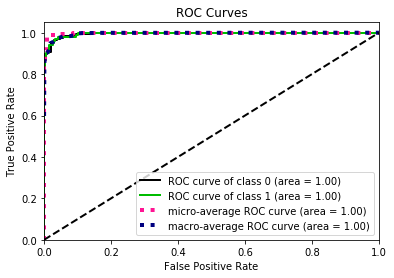

In [378]:

saved_model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])
saved_model.load_weights('model_sequential.h5')


my_pred=saved_model.predict_proba(X_test)

skplt.metrics.plot_roc(y_test, my_pred)


In [379]:

saved_pred = saved_model.predict_proba(X_test)

saved_float = saved_pred[:,1]
saved_bool = pd.DataFrame(saved_float.round())


saved_model_cm = confusion_matrix(y_test,saved_bool)
saved_model_cm

array([[1025,    3],
       [  15,   89]], dtype=int64)

In [380]:

classifier = 'Sequential'

# save following files for the client

In [381]:
np.savetxt('y_pred.csv',my_pred[:,1], delimiter=',')
np.savetxt('X_test.csv',X_test, delimiter=',')
np.savetxt('y_test.csv',y_test, delimiter=',')

In [382]:
model = Sequential()
# first layer must have a defined input shape
model.add(Dense(32, input_dim=27))
# afterwards, Keras does automatic shape inference
model.add(Dense(32,activation = 'relu'))

model.add(Dense(16,activation = 'relu'))

model.add(Dense(8,activation = 'relu'))

model.add(Dense(4,activation = 'relu'))


model.add(Dense(2,activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 32)                896       
_________________________________________________________________
dense_62 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_63 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_64 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_65 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_66 (Dense)             (None, 2)                 10        
Total params: 2,662
Trainable params: 2,662
Non-trainable params: 0
_________________________________________________________________


In [383]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])

# fitting a new model

In [384]:
%%time
model.fit(X_train,y_train,epochs= 500)

Epoch 1/500
2640/2640 [==============================] - 1s 227us/step - loss: 0.2703 - acc: 0.8966
Epoch 2/500
2640/2640 [==============================] - 0s 49us/step - loss: 0.1635 - acc: 0.9500
Epoch 3/500
2640/2640 [==============================] - 0s 36us/step - loss: 0.1441 - acc: 0.9519
Epoch 4/500
2640/2640 [==============================] - 0s 35us/step - loss: 0.1252 - acc: 0.9553
Epoch 5/500
2640/2640 [==============================] - 0s 37us/step - loss: 0.1317 - acc: 0.9553
Epoch 6/500
2640/2640 [==============================] - 0s 37us/step - loss: 0.1081 - acc: 0.9610
Epoch 7/500
2640/2640 [==============================] - 0s 38us/step - loss: 0.0969 - acc: 0.9640
Epoch 8/500
2640/2640 [==============================] - 0s 37us/step - loss: 0.0844 - acc: 0.9708
Epoch 9/500
2640/2640 [==============================] - 0s 37us/step - loss: 0.0933 - acc: 0.9701
Epoch 10/500
2640/2640 [==============================] - 0s 36us/step - loss: 0.0736 - acc: 0.9731
Epoch 11

2640/2640 [==============================] - 0s 39us/step - loss: 0.0350 - acc: 0.9864
Epoch 163/500
2640/2640 [==============================] - 0s 39us/step - loss: 0.0215 - acc: 0.9917
Epoch 164/500
2640/2640 [==============================] - 0s 37us/step - loss: 0.0290 - acc: 0.9894
Epoch 165/500
2640/2640 [==============================] - 0s 39us/step - loss: 0.0264 - acc: 0.9909
Epoch 166/500
2640/2640 [==============================] - 0s 38us/step - loss: 0.0234 - acc: 0.9936
Epoch 167/500
2640/2640 [==============================] - 0s 36us/step - loss: 0.0257 - acc: 0.9902
Epoch 168/500
2640/2640 [==============================] - 0s 37us/step - loss: 0.0282 - acc: 0.9894
Epoch 169/500
2640/2640 [==============================] - 0s 36us/step - loss: 0.0372 - acc: 0.9871
Epoch 170/500
2640/2640 [==============================] - 0s 36us/step - loss: 0.0318 - acc: 0.9867
Epoch 171/500
2640/2640 [==============================] - 0s 45us/step - loss: 0.0251 - acc: 0.9920
Epoc

2640/2640 [==============================] - 0s 62us/step - loss: 0.0107 - acc: 0.9951
Epoch 324/500
2640/2640 [==============================] - 0s 74us/step - loss: 0.0127 - acc: 0.9939
Epoch 325/500
2640/2640 [==============================] - 0s 46us/step - loss: 0.0184 - acc: 0.9920
Epoch 326/500
2640/2640 [==============================] - 0s 50us/step - loss: 0.0139 - acc: 0.9951
Epoch 327/500
2640/2640 [==============================] - 0s 48us/step - loss: 0.0119 - acc: 0.9947
Epoch 328/500
2640/2640 [==============================] - 0s 42us/step - loss: 0.0124 - acc: 0.9947
Epoch 329/500
2640/2640 [==============================] - 0s 40us/step - loss: 0.0198 - acc: 0.9951
Epoch 330/500
2640/2640 [==============================] - 0s 39us/step - loss: 0.0256 - acc: 0.9902
Epoch 331/500
2640/2640 [==============================] - 0s 43us/step - loss: 0.0200 - acc: 0.9928
Epoch 332/500
2640/2640 [==============================] - 0s 40us/step - loss: 0.0181 - acc: 0.9932
Epoc

2640/2640 [==============================] - 0s 38us/step - loss: 0.0084 - acc: 0.9955
Epoch 486/500
2640/2640 [==============================] - 0s 39us/step - loss: 0.0202 - acc: 0.9928
Epoch 487/500
2640/2640 [==============================] - 0s 40us/step - loss: 0.0375 - acc: 0.9879
Epoch 488/500
2640/2640 [==============================] - 0s 47us/step - loss: 0.0119 - acc: 0.9966
Epoch 489/500
2640/2640 [==============================] - 0s 46us/step - loss: 0.0075 - acc: 0.9970
Epoch 490/500
2640/2640 [==============================] - 0s 43us/step - loss: 0.0072 - acc: 0.9970
Epoch 491/500
2640/2640 [==============================] - 0s 41us/step - loss: 0.0088 - acc: 0.9966
Epoch 492/500
2640/2640 [==============================] - 0s 39us/step - loss: 0.0135 - acc: 0.9955
Epoch 493/500
2640/2640 [==============================] - 0s 38us/step - loss: 0.0103 - acc: 0.9943
Epoch 494/500
2640/2640 [==============================] - 0s 39us/step - loss: 0.0105 - acc: 0.9958
Epoc

# ROC AUC PLOT

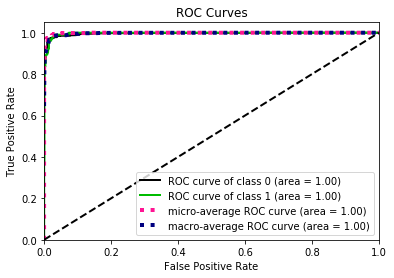

In [385]:


y_probas=model.predict_proba(X_test)

skplt.metrics.plot_roc(y_test, y_probas)

In [386]:

threshold = 0.5
y_integer = [0 if p < threshold else 1 for p in y_probas[:,1]]

In [387]:
len(y_integer)

1132

In [388]:
cm = confusion_matrix(y_test, y_integer)
cm

array([[1018,   10],
       [  10,   94]], dtype=int64)

In [389]:

np.savetxt('y_integer.csv',y_test, delimiter=',')

In [390]:
accuracy= accuracy_score(y_test, y_integer)
accuracy

0.9823321554770318

In [391]:
accuracy= accuracy_score(y_test, y_integer)
precision,recall,fscore,support=score(y_test,y_integer,average='macro')
print(accuracy)

MCC= matthews_corrcoef(y_test, y_integer)

Aresult = [[classifier,accuracy,precision,recall,fscore,MCC]]
oneresultdf = pd.DataFrame(Aresult,columns=['model', 'accuracy', 'precision','recall', 'fscore','MCC'])

results.append(oneresultdf)
results=pd.concat([results, oneresultdf])
results

0.9823321554770318


,model,accuracy,precision,recall,fscore,MCC
0,RandomForestClassifier,0.997350,0.989989,0.994220,0.992093,0.984200
0,RandomForestRegressor,0.998233,0.990566,0.999027,0.994751,0.989557
0,Sequential,0.982332,0.947059,0.947059,0.947059,0.894119


# writing weights using model.save(filename.h5)

In [393]:
model.save('model_sequential.h5')

# needing one observation which predicted the rare event..(only 8%)

In [394]:
X_test.iloc[6]


age                             53.00
TSH                              8.10
T3                               2.40
TT4                            132.00
T4U                              1.28
FTI                            103.00
sex_F                            1.00
sex_M                            0.00
on thyroxine_t                   0.00
query on thyroxine_t             0.00
on antithyroid medication_t      0.00
sick_t                           0.00
pregnant_t                       0.00
thyroid surgery_t                0.00
I131 treatment_t                 0.00
query hypothyroid_t              0.00
query hyperthyroid_t             0.00
lithium_t                        0.00
goitre_t                         0.00
tumor_t                          0.00
hypopituitary_t                  0.00
psych_t                          0.00
TSH measured_t                   1.00
T3 measured_t                    1.00
TT4 measured_t                   1.00
T4U measured_t                   1.00
FTI measured

In [461]:
#y_integer = pd.DataFrame(y_integer) 
X_test = pd.DataFrame(X_test) 

In [462]:
#y_integer.columns = ['a']

In [463]:
y_integer

,a
0,0
1,0
2,0
3,0
4,0
...,...
1127,0
1128,1
1129,1
1130,0


In [481]:
p=y_integer>0
#p=pd.Series(p)
p

,a
0,False
1,False
2,False
3,False
4,False
...,...
1127,False
1128,True
1129,True
1130,False


In [482]:
X_test[(y_integer>0).values]

,age,TSH,T3,TT4,T4U,FTI,sex_F,sex_M,on thyroxine_t,query on thyroxine_t,...,lithium_t,goitre_t,tumor_t,hypopituitary_t,psych_t,TSH measured_t,T3 measured_t,TT4 measured_t,T4U measured_t,FTI measured_t
3692,53.0,8.1,2.4000,132.0,1.280,103.000000,1,0,0,0,...,0,0,0,0,0,1,1,1,1,1
3508,76.0,27.0,2.3000,135.0,1.540,88.000000,1,0,0,0,...,0,0,0,0,0,1,1,1,1,1
1610,30.0,8.5,2.1000,91.0,1.160,79.000000,1,0,0,0,...,0,0,0,0,0,1,1,1,1,1
2047,59.0,9.7,2.0135,81.0,0.960,84.000000,1,0,0,0,...,0,0,0,0,0,1,0,1,1,1
2702,60.0,183.0,1.1000,45.0,0.970,46.000000,1,0,0,0,...,0,0,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,7.0,15.0,2.0135,137.0,1.030,133.000000,0,1,0,0,...,0,0,0,0,0,1,0,1,1,1
122,31.0,7.8,2.0000,159.0,1.510,105.000000,1,0,0,0,...,0,0,0,0,0,1,1,1,1,1
3379,33.0,6.2,0.8000,51.0,0.880,58.000000,1,0,0,0,...,0,0,0,0,0,1,1,1,1,1
529,76.0,11.0,0.8000,60.0,1.040,58.000000,1,0,0,0,...,0,0,0,0,0,1,1,1,1,1
